In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import pandas as pd 
import random
import math
import time
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import datetime
import operator 
plt.style.use('fivethirtyeight')
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv(r'C:\Users\SUDHANSHU\Downloads\countries-aggregated_csv.csv')

In [3]:
df

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-23,Afghanistan,0,0,0
2,2020-01-24,Afghanistan,0,0,0
3,2020-01-25,Afghanistan,0,0,0
4,2020-01-26,Afghanistan,0,0,0
...,...,...,...,...,...
62834,2020-12-11,Zimbabwe,11162,9324,306
62835,2020-12-12,Zimbabwe,11219,9359,307
62836,2020-12-13,Zimbabwe,11246,9451,307
62837,2020-12-14,Zimbabwe,11358,9554,309


In [4]:
df.head()

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-23,Afghanistan,0,0,0
2,2020-01-24,Afghanistan,0,0,0
3,2020-01-25,Afghanistan,0,0,0
4,2020-01-26,Afghanistan,0,0,0


In [5]:
df.tail()

,Date,Country,Confirmed,Recovered,Deaths
62834,2020-12-11,Zimbabwe,11162,9324,306
62835,2020-12-12,Zimbabwe,11219,9359,307
62836,2020-12-13,Zimbabwe,11246,9451,307
62837,2020-12-14,Zimbabwe,11358,9554,309
62838,2020-12-15,Zimbabwe,11522,9599,310


In [6]:
df.head(10)

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-23,Afghanistan,0,0,0
2,2020-01-24,Afghanistan,0,0,0
3,2020-01-25,Afghanistan,0,0,0
4,2020-01-26,Afghanistan,0,0,0
5,2020-01-27,Afghanistan,0,0,0
6,2020-01-28,Afghanistan,0,0,0
7,2020-01-29,Afghanistan,0,0,0
8,2020-01-30,Afghanistan,0,0,0
9,2020-01-31,Afghanistan,0,0,0


In [7]:
df.tail(10)

,Date,Country,Confirmed,Recovered,Deaths
62829,2020-12-06,Zimbabwe,10718,8880,291
62830,2020-12-07,Zimbabwe,10839,8972,294
62831,2020-12-08,Zimbabwe,10912,9062,303
62832,2020-12-09,Zimbabwe,11007,9147,304
62833,2020-12-10,Zimbabwe,11081,9253,305
62834,2020-12-11,Zimbabwe,11162,9324,306
62835,2020-12-12,Zimbabwe,11219,9359,307
62836,2020-12-13,Zimbabwe,11246,9451,307
62837,2020-12-14,Zimbabwe,11358,9554,309
62838,2020-12-15,Zimbabwe,11522,9599,310


In [8]:
df.info

<bound method DataFrame.info of              Date      Country  Confirmed  Recovered  Deaths
0      2020-01-22  Afghanistan          0          0       0
1      2020-01-23  Afghanistan          0          0       0
2      2020-01-24  Afghanistan          0          0       0
3      2020-01-25  Afghanistan          0          0       0
4      2020-01-26  Afghanistan          0          0       0
...           ...          ...        ...        ...     ...
62834  2020-12-11     Zimbabwe      11162       9324     306
62835  2020-12-12     Zimbabwe      11219       9359     307
62836  2020-12-13     Zimbabwe      11246       9451     307
62837  2020-12-14     Zimbabwe      11358       9554     309
62838  2020-12-15     Zimbabwe      11522       9599     310

[62839 rows x 5 columns]>

In [9]:
df.describe

<bound method NDFrame.describe of              Date      Country  Confirmed  Recovered  Deaths
0      2020-01-22  Afghanistan          0          0       0
1      2020-01-23  Afghanistan          0          0       0
2      2020-01-24  Afghanistan          0          0       0
3      2020-01-25  Afghanistan          0          0       0
4      2020-01-26  Afghanistan          0          0       0
...           ...          ...        ...        ...     ...
62834  2020-12-11     Zimbabwe      11162       9324     306
62835  2020-12-12     Zimbabwe      11219       9359     307
62836  2020-12-13     Zimbabwe      11246       9451     307
62837  2020-12-14     Zimbabwe      11358       9554     309
62838  2020-12-15     Zimbabwe      11522       9599     310

[62839 rows x 5 columns]>

In [14]:
unique_provinces = df['Country'][df.Confirmed >0 ].unique()

In [15]:
province_confirmed_cases = []
for i in unique_provinces:
    province_confirmed_cases.append(df[df.Confirmed > 0 ][df['Country'] == i].Confirmed.sum())

<ipython-input-15-34f43dd1c135>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  province_confirmed_cases.append(df[df.Confirmed > 0 ][df['Country'] == i].Confirmed.sum())


In [16]:
for i in range(len(unique_provinces)):
    print (f'{unique_provinces[i]}: {province_confirmed_cases[i]} cases')

Afghanistan: 7678297 cases
Albania: 2854401 cases
Algeria: 9036209 cases
Andorra: 559442 cases
Angola: 1072098 cases
Antigua and Barbuda: 20431 cases
Argentina: 123286792 cases
Armenia: 12065490 cases
Australia: 4639073 cases
Austria: 16621123 cases
Azerbaijan: 9637787 cases
Bahamas: 649024 cases
Bahrain: 11473406 cases
Bangladesh: 60729583 cases
Barbados: 39834 cases
Belarus: 17549269 cases
Belgium: 43718761 cases
Belize: 410499 cases
Benin: 411090 cases
Bhutan: 44852 cases
Bolivia: 20182287 cases
Bosnia and Herzegovina: 6327067 cases
Botswana: 714502 cases
Brazil: 772975680 cases
Brunei: 38785 cases
Bulgaria: 7976740 cases
Burkina Faso: 394947 cases
Burma: 4882971 cases
Burundi: 86362 cases
Cabo Verde: 1034630 cases
Cambodia: 57568 cases
Cameroon: 3816189 cases
Canada: 39730563 cases
Central African Republic: 875822 cases
Chad: 246760 cases
Chile: 82963435 cases
China: 26936243 cases
Colombia: 130536662 cases
Comoros: 86087 cases
Congo (Brazzaville): 791567 cases
Congo (Kinshasa): 19

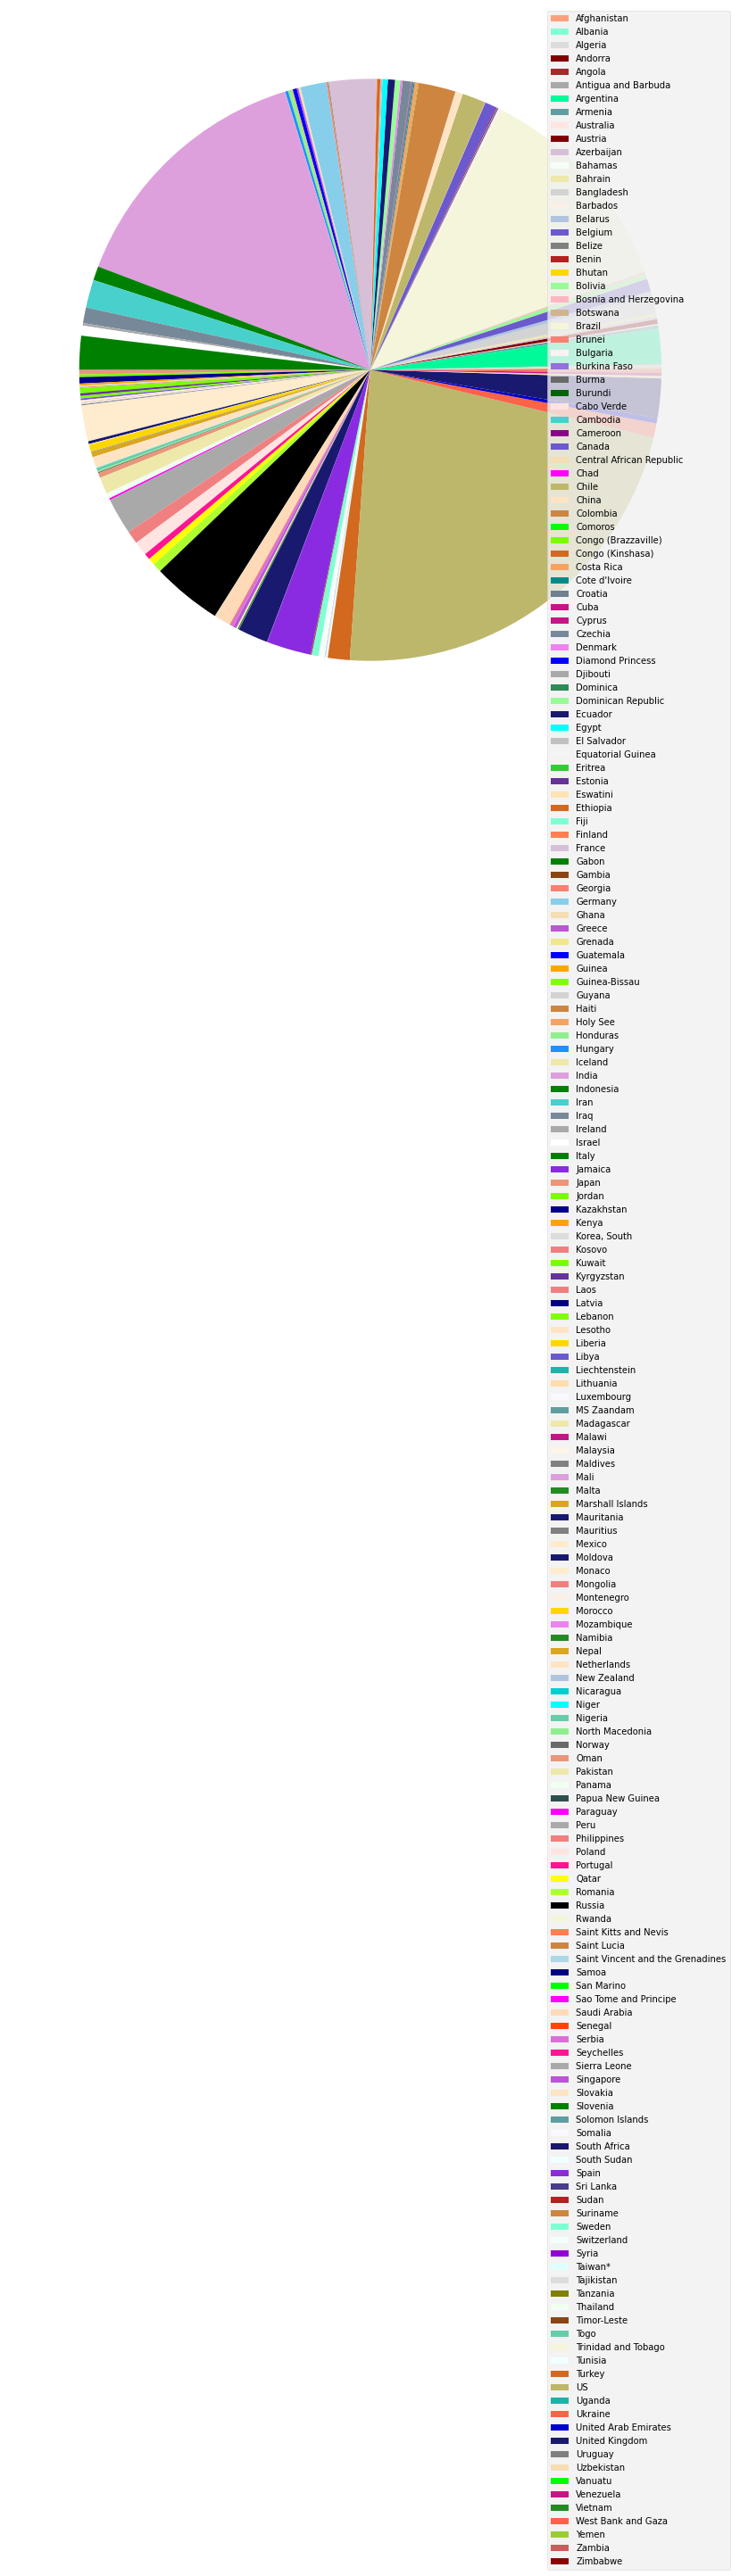

In [17]:
c = random.choices(list(mcolors.CSS4_COLORS.values()),k = len(unique_provinces))
plt.figure(figsize=(15,15))
plt.pie(province_confirmed_cases, colors = c)
plt.legend(unique_provinces, loc='best')
plt.show()

In [28]:
province_Death_cases = []
for i in unique_provinces:
    province_Death_cases.append(df[df.Deaths>0][df['Country']==i].Deaths.sum())

<ipython-input-28-ec4439515bfd>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  province_Death_cases.append(df[df.Deaths>0][df['Country']==i].Deaths.sum())
